## Observations and Insights 

In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
%matplotlib notebook
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df =pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [62]:
# Checking the number of mice.
unique_mice = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mice_number = len(unique_mice["Mouse ID"])
mice_number

1888

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df['Mouse ID'].value_counts()


g989    13
a818    10
a444    10
a401    10
l471    10
        ..
t573     1
u153     1
x226     1
o848     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [64]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_index = merge_df.set_index('Mouse ID')
duplicate_mouse = mice_index.loc['g989',:]
duplicate_mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice.df = pd.DataFrame(unique_mice, columns =["Mouse ID", "Drug Regimen","Sex","Age_months"])
unique_mice.df

C:\Users\Badison\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Mouse ID,Drug Regimen,Sex,Age_months
0,k403,Ramicane,Male,21
1,k403,Ramicane,Male,21
2,k403,Ramicane,Male,21
3,k403,Ramicane,Male,21
4,k403,Ramicane,Male,21
...,...,...,...,...
1888,z969,Naftisol,Male,9
1889,z969,Naftisol,Male,9
1890,z969,Naftisol,Male,9
1891,z969,Naftisol,Male,9


In [66]:
# Checking the number of mice in the clean DataFrame.
clean_number = len(unique_mice["Mouse ID"])
clean_number

1888

## Summary Statistics

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


drug_group = unique_mice.groupby(["Drug Regimen"])
tumor_mean = drug_group["Tumor Volume (mm3)"].mean()
tumor_mean

#find the median tumor volume of data grouped by drug/tumor volume
tumor_median = drug_group["Tumor Volume (mm3)"].median()
tumor_median

#find the variance tumor volume of data grouped by drug/tumor volume
tumor_var = drug_group["Tumor Volume (mm3)"].var()
tumor_var

#find the standard dev tumor volume of data grouped by drug/tumor volume
tumor_stdev = drug_group["Tumor Volume (mm3)"].std()
tumor_stdev

#find the SEM tumor volume of data grouped by drug/tumor volume
tumor_sem = drug_group["Tumor Volume (mm3)"].sem()
tumor_sem

# This method is the most straighforward, creating multiple series and putting them all together at the end.
statistics_dict = {
        "Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Deviation": tumor_stdev, "SEM":tumor_sem}
statistics_df = pd.DataFrame(statistics_dict)
statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

group_stats = unique_mice.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

group_stats


C:\Users\Badison\anaconda3\New folder\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Badison\anaconda3\New folder\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Badison\anaconda3\New folder\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

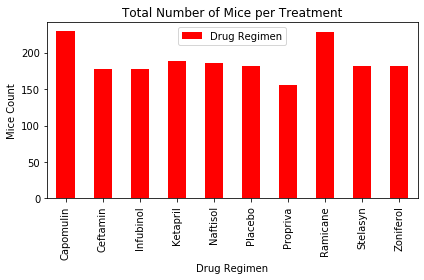

In [69]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_mice = unique_mice.groupby("Drug Regimen")

#find the number of data points for each regimen
drug_count = drug_mice["Drug Regimen"].count()
drug_count

drug_df = pd.DataFrame(drug_count)
drug_df 

#create bar chart
drug_chart = drug_df.plot(kind= 'bar', title= "Total Number of Mice per Treatment", color ='r')

#add the details 
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Mice Count")
plt.tight_layout()

([<matplotlib.axis.XTick at 0x1ae77af8288>,
 <a list of 10 Text xticklabel objects>)

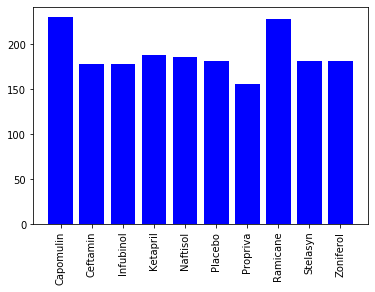

In [70]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#use drug_mice for counts
#create x axis and ticks
x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_count, color ="b")
plt.xticks(tick_locations, list(drug_count.index), rotation = "vertical")

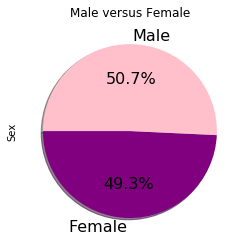

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = unique_mice.groupby("Sex")
# gender_count = mice_gender.count()
gender_df = pd.DataFrame(mice_gender["Sex"].count())
gender_df

#generate pie chart
gender_df.plot(kind='pie', y= "Sex", \
                        title="Male versus Female",startangle=180,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["purple","pink"],legend =False)

(-1.100256111605303,
 1.1053783437113598,
 -1.1062425414441643,
 1.103265408136953)

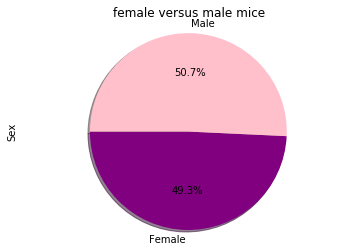

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#use gender group from pandas cell
genders = list(gender_df.index.values)

# The values of each section of the pie chart
gender_counts = gender_df['Sex']

# Create Pie Chart
colors = ["purple", "pink"]
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")



## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
# drug_df = pd.DataFrame(drug_group)
# four_drugs = unique_mice.loc[unique_mice["Drug Regimen"]== "Capomulin"]


# Start by getting the last (greatest) timepoint for each mouse
max_mice = unique_mice.groupby("Mouse ID").max()["Timepoint"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge =pd.merge(max_mice.reset_index(), merge_df , on=["Timepoint","Mouse ID"])
max_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.779999999999994
The the median of Capomulin is: 38.125 
Values below 32.38 for Capomulin could be outliers.
Values above 40.16 for Capomulin could be outliers.


ValueError: Dimensions of labels and X must be compatible

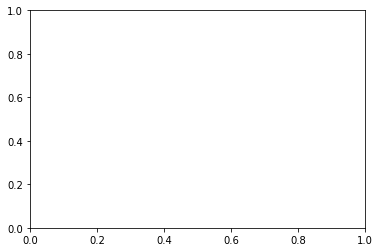

In [152]:
# Put treatments into a list for for loop (and later for plot labels)
four_list= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

four_drugs =  unique_mice[unique_mice['Drug Regimen'].isin(four_list)]    
four_drugs
four_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
                                                                           
four_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# Create empty list to fill with tumor vol data (for plotting)
# tumor_vol = []
counter = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_list:
    
#     tumor_vol_df = max_merge.loc[max_merge["Drug Regimen"] == drug,["Tumor Volume (mm3)"]]
    quartiles = four_tumor_unstack[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = upperq-lowerq
# Determine outliers using upper and lower bounds
    if counter == 0:
        print(f"{drug} IQR data is:")
        print(f"The lower quartile of {drug} is: {lowerq}")
        print(f"The upper quartile of {drug} is: {upperq}")
        print(f"The interquartile range of {drug} is: {iqr}")
        print(f"The the median of {drug} is: {quartiles[0.5]} ")
        print(f"Values below {lowerq} for {drug} could be outliers.")
        print(f"Values above {upperq} for {drug} could be outliers.")
        counter += 1
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
plt.boxplot(four_tumor, labels = four_list)
plt.show()    

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 0, 'time (days)')

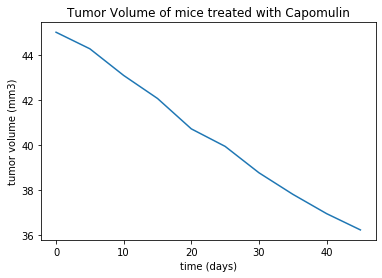

In [126]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = unique_mice.loc[unique_mice["Drug Regimen"] == "Capomulin"]
capomulin_data

capomulin_time = capomulin_data.groupby(['Timepoint'])
capomulin_volume = capomulin_time["Tumor Volume (mm3)"].mean()
capomulin_df = pd.DataFrame(capomulin_volume)
capomulin_df

timepoint = list(capomulin_volume.index.values)
timepoint
plt.plot(capomulin_df)
plt.title("Tumor Volume of mice treated with Capomulin")
plt.ylabel("tumor volume (mm3)")
plt.xlabel("time (days)")


Text(0, 0.5, 'Tumor Volume (mm3)')

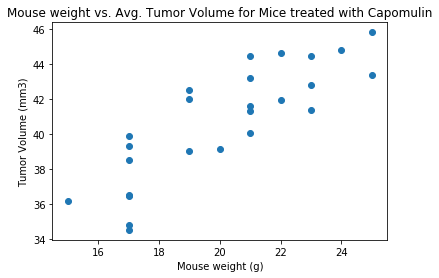

In [131]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_weight = capomulin_data.groupby(['Mouse ID']).agg(\
        mouse_weight=('Weight (g)', np.mean),\
        tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_weight
plt.scatter(
    cap_weight["mouse_weight"],
    cap_weight["tumor_vol_mean"])

plt.title("Mouse weight vs. Avg. Tumor Volume for Mice treated with Capomulin")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

0.841946102026108


Text(0, 0.5, 'Tumor Volume (mm3)')

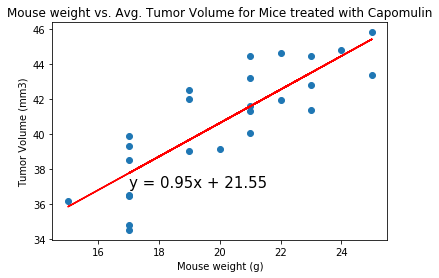

In [162]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(cap_weight['mouse_weight'],cap_weight['tumor_vol_mean'])[0]
print(correlation)

x_values = cap_weight["mouse_weight"]
y_values = cap_weight["tumor_vol_mean"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume for Mice treated with Capomulin")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")